In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices


H0: The average frequency of visits (both Avg_class_frequency_total and Avg_class_frequency_current_month) does not differ between departing and remaining customers.

H1: Average frequency of visits differs between departing and remaining customers

H0: Средняя частота посещений (как Avg_class_frequency_total, так и Avg_class_frequency_current_month) не отличается между ушедшими и оставшимися клиентами.

H1: Средняя частота посещений отличается между ушедшими и оставшимися

In [3]:
file = r'C:\\Users\palux\Desktop\df s\gym_churn.csv'
df = pd.read_csv(file)

In [4]:
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


1. gender – Пол клиента
2. Near_Location – Проживает ли клиент рядом с местом предоставления услуг (1 - да, 0 - нет).
3. Partner – Является ли клиент сотрудником компании-партнера.
4. Promo_friends – Зарегистрировался ли клиент через акцию "приведи друга" (1 - да, 0 - нет).
5. Phone – Есть ли у клиента указанный номер телефона (1 - да, 0 - нет).
6. Contract_period – Срок действия контракта (в месяцах).
7. Group_visits – Посещает ли клиент групповые занятия (1 - да, 0 - нет).
8. Age – Возраст клиента.
9. Avg_additional_charges_total – Средняя сумма дополнительных расходов клиента (покупки напитков, прокат оборудования).
10. Month_to_end_contract – Количество месяцев до окончания текущего контракта.
11. Lifetime – Длительность взаимодействия клиента с компанией (в месяцах).
12. Avg_class_frequency_total – Средняя частота посещений занятий клиентом за всё время.
13. Avg_class_frequency_current_month – Средняя частота посещений занятий клиентом за последний месяц.
14. Churn – Целевой столбец, указывающий, ушел ли клиент (1 - ушел, 0 - остался).

<Axes: >

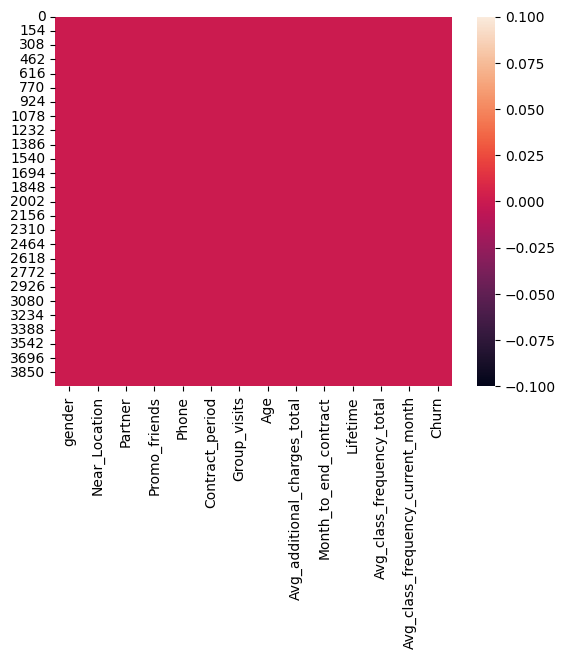

In [5]:
sns.heatmap(df.isna())

In [6]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


There are no passes in the data.

In [7]:
import scipy.stats as stats

In [8]:
stats.shapiro(df['Avg_class_frequency_total'])


ShapiroResult(statistic=np.float64(0.9912722741098104), pvalue=np.float64(5.735721527477784e-15))

pvalue = 5.735721527477784e-15

statistic = 0.99

<Axes: xlabel='Avg_class_frequency_total', ylabel='Count'>

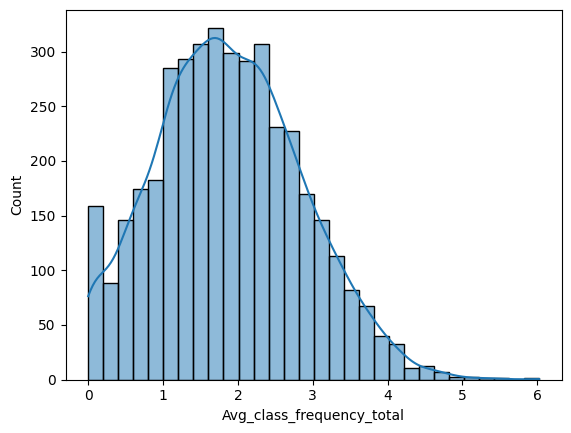

In [9]:
sns.histplot(df['Avg_class_frequency_total'], bins = 30, kde = True)

Distribution is not normal, I will conduct the test Manna-Whitney



In [10]:
group_1 = df[df['Churn'] == 1]
group_0 = df[df['Churn'] == 0]

In [11]:
from scipy.stats import mannwhitneyu

In [12]:
# Тест Манна-Уитни для Avg_class_frequency_total
stat_total, p_total = mannwhitneyu(
    group_1["Avg_class_frequency_total"], 
    group_0["Avg_class_frequency_total"], 
    alternative="two-sided"
)



In [13]:
# Тест Манна-Уитни для Avg_class_frequency_current_month
stat_current, p_current = mannwhitneyu(
    group_1["Avg_class_frequency_current_month"], 
    group_0["Avg_class_frequency_current_month"], 
    alternative="two-sided"
)

In [14]:
print(f"Avg_class_frequency_total: U = {stat_total}, p = {p_total}")
print(f"Avg_class_frequency_current_month: U = {stat_current}, p = {p_current}")


Avg_class_frequency_total: U = 1043052.0, p = 1.1663444042723989e-57
Avg_class_frequency_current_month: U = 702080.0, p = 1.11054132072952e-155


In [15]:
# Интерпретация результата
alpha = 0.05
if p_total < alpha:
    print("Средняя частота посещений (за всё время) значимо отличается между группами.")
else:
    print("Средняя частота посещений (за всё время) НЕ отличается между группами.")

if p_current < alpha:
    print("Средняя частота посещений (в текущем месяце) значимо отличается между группами.")
else:
    print("Средняя частота посещений (в текущем месяце) НЕ отличается между группами.")

Средняя частота посещений (за всё время) значимо отличается между группами.
Средняя частота посещений (в текущем месяце) значимо отличается между группами.


Следовательно альтернативная гипотеза, что частота посещений между ушедшими и оставшимися клиентами значимо различается.

Avg_class_frequency_total    Axes(0.125,0.11;0.775x0.77)
dtype: object

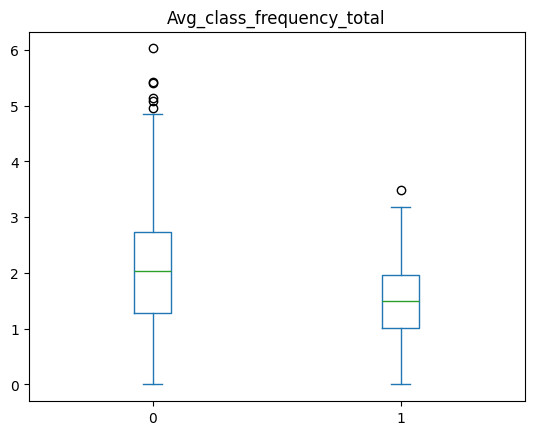

In [48]:
df.plot.box(column = 'Avg_class_frequency_total', by='Churn')

Средняя частота посещений значимо выше у группы 0, что согласуется с результатами Манна-Уитни.

Разнообразие у группы 0 более разнообразное, а у группы 1 - более компактное.

Так как тест Манна-Уитни выявил статистически значимое различие, можно заключить, что разница в посещаемости между группами не случайна